# Active Learning

## Importing Libraries


In [1]:
from sklearn.datasets import load_digits
import pandas
from superintendent import ClassLabeller
import numpy as np

import matplotlib.pyplot as plt

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  from collections import Mapping, defaultdict


# Loading Dataset

(500, 64)
(500, 8, 8)


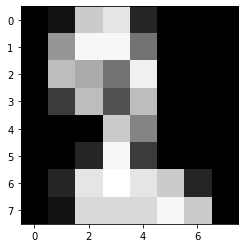

In [2]:
digits = load_digits().data[:500, :] # Change the value "500"  as per requirements

print(digits.shape)
digits = digits.reshape(-1, 8, 8)
print(digits.shape)

# plt.imshow(digits[0,:]) 

plt.imshow(digits[499],cmap="Greys_r") # GreyScale



In [3]:
digits[3]

array([[ 0.,  0.,  7., 15., 13.,  1.,  0.,  0.],
       [ 0.,  8., 13.,  6., 15.,  4.,  0.,  0.],
       [ 0.,  2.,  1., 13., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 15., 11.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 12., 12.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1., 10.,  8.,  0.],
       [ 0.,  0.,  8.,  4.,  5., 14.,  9.,  0.],
       [ 0.,  0.,  7., 13., 13.,  9.,  0.,  0.]])

# Model

In [4]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    solver="lbfgs",
    multi_class="multinomial",
    max_iter=5000
)

In [5]:
def preprocess_mnist(x, y):
    return x.reshape(-1, 64), y

# Adding labelled data 
#### Don't label if you are unsure, press the "Skip" button

Please note that size of dataset is 500. 
The dataset size can be changed anytime in 2nd codeblock of this notebook.

So for 10% of it you have to fill 50 entries

In [23]:
from superintendent import ClassLabeller

print("")

data_labeller = ClassLabeller.from_images(
    canvas_size=(200, 500),
    features=digits,
    model=model,
    options=range(10),
    acquisition_function='entropy', # Change to "entropy", or any other ,
    model_preprocess=preprocess_mnist
)

data_labeller



ClassLabeller(children=(HBox(children=(HBox(children=(FloatProgress(value=0.0, description='Progress:', max=1.…

TypeError: cross_val_score() got an unexpected keyword argument 'error_score'

# Below shows the list of labelled data

In [7]:
ld = data_labeller.new_labels
for i in ld:
    if i:
        print(i, end=" ")

0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 5 5 0 9 8 

In [10]:
dir(data_labeller.progressbar)
print("Progress: " + str(data_labeller.progressbar.value *100) + "%") 


Progress: 7.8%


In [22]:
y = np.array([int(label) for label in data_labeller.new_labels if label is not None] )
digits.reshape(500,64)
x = digits[ [i for i, _ in enumerate(y)] ]
print([i for i, _ in enumerate(y)])
print(x)
print(y)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]
[[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  6. ...  2.  0.  0.]
  [ 0.  0. 15. ... 15.  3.  0.]
  [ 0.  2. 16. ... 13.  9.  0.]
  ...
  [ 0.  1. 15. ... 13.  1.  0.]
  [ 0.  0. 16. ... 10.  0.  0.]
  [ 0.  0.  7. ...  1.  0.  0.]]

 [[ 0.  0. 13. ...  0.  0.  0.]
  [ 0.  5. 16. 

In [14]:
model.fit(x,y)

ValueError: Found array with dim 3. Estimator expected <= 2.

In [29]:
x

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0., 10., ...,  3.,  0.,  0.],
        [ 0.,  4., 16., ..., 14.,  1.,  0.],
        [ 0.,  4., 16., ..., 11.,  7.,  0.

In [13]:
digits.shape

(500, 8, 8)